# Getting data

In this study we use data from [Taft et. al., 2022.](https://github.com/grigorievaekaterina/BI_antibodies_project/tree/main#:~:text=was%20used%20from-,Taft%20et.%20al.%2C%202022,-.) Let us download the archive from [biorxiv.org](https://www.biorxiv.org/content/10.1101/2021.12.07.471580v1), where the preprint of the article is.

In [ ]:
!wget https://www.biorxiv.org/content/biorxiv/early/2021/12/09/2021.12.07.471580/DC2/embed/media-2.zip

--2023-05-22 06:30:57--  https://www.biorxiv.org/content/biorxiv/early/2021/12/09/2021.12.07.471580/DC2/embed/media-2.zip
Resolving www.biorxiv.org (www.biorxiv.org)... 104.18.28.142, 104.18.29.142
Connecting to www.biorxiv.org (www.biorxiv.org)|104.18.28.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘media-2.zip’

media-2.zip             [                <=> ]  11.65M  3.40MB/s    in 3.4s    

2023-05-22 06:31:02 (3.40 MB/s) - ‘media-2.zip’ saved [12212533]



Unzipping the archive

In [ ]:
!unzip /content/media-2.zip

Archive:  /content/media-2.zip
   creating: Train:Test Sequences/
  inflating: Train:Test Sequences/ACE2_train_data.csv  
  inflating: __MACOSX/Train:Test Sequences/._ACE2_train_data.csv  
  inflating: Train:Test Sequences/.DS_Store  
  inflating: __MACOSX/Train:Test Sequences/._.DS_Store  
  inflating: Train:Test Sequences/ACE2_test_data.csv  
  inflating: __MACOSX/Train:Test Sequences/._ACE2_test_data.csv  
  inflating: Train:Test Sequences/REGN33_test_data.csv  
  inflating: __MACOSX/Train:Test Sequences/._REGN33_test_data.csv  
  inflating: Train:Test Sequences/ACE2_unseen.tsv  
  inflating: __MACOSX/Train:Test Sequences/._ACE2_unseen.tsv  
  inflating: Train:Test Sequences/LY16_unseen.tsv  
  inflating: __MACOSX/Train:Test Sequences/._LY16_unseen.tsv  
  inflating: Train:Test Sequences/REGN33_train_data.csv  
  inflating: __MACOSX/Train:Test Sequences/._REGN33_train_data.csv  
  inflating: Train:Test Sequences/REGN87_test_data.csv  
  inflating: __MACOSX/Train:Test Sequences/._REG

# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Let us look at the data. Here we want to open train and test datasets of each antibody data. We expect eight datasets, two for four antibodies: LY16, LY555, REGN33, REGN87.

## LY16

In [ ]:
LY16_train = pd.read_csv("/content/Train:Test Sequences/LY16_train_data.csv")
LY16_test = pd.read_csv("/content/Train:Test Sequences/LY16_test_data.csv")     

First five raws of a train dataset.

In [ ]:
LY16_train.head()

,Unnamed: 0,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody
0,26455,KNEGFNCYIPLVTYGFHTTTGVSY,IGHV_RBD,1,IGHJ_RBD,0.000028,0,7,LY16
1,1215,KNKGFNCYSPITEYGFFPTNGKNF,IGHV_RBD,2,IGHJ_RBD,0.000093,1,9,LY16
2,22287,SKQGFNCYCPLIGYGFQRTFGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16
3,38720,KNRQFNCYWPLVRYGFWTTSGVGW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,9,LY16
4,551,KNPGFNCYLPLGHYGFQPTNGRDF,IGHV_RBD,3,IGHJ_RBD,0.000140,1,7,LY16


26881 raws for train data, 2987 for test one.

In [ ]:
len(LY16_train), len(LY16_test)

(26881, 2987)

Let us combine data for further steps and name it just LY16.

In [ ]:
LY16 = pd.concat([LY16_test, LY16_train])
LY16.head()

,Unnamed: 0,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody
0,56910,KNTGFNCYFPLLAYGFHPTSGVDY,IGHV_RBD,1,IGHJ_RBD,0.000063,0,6,LY16
1,4131,KNPGFNCYHPIVGYGFQPTIGHDF,IGHV_RBD,1,IGHJ_RBD,0.000047,1,9,LY16
2,46782,TTAGFNCYMPITRYGFWPTDGRSW,IGHV_RBD,1,IGHJ_RBD,0.000028,0,12,LY16
3,11781,RNRGFNCYDPIHKYGFHRTNGLNY,IGHV_RBD,1,IGHJ_RBD,0.000047,1,10,LY16
4,33282,KNKKFNCYVPLVTYGFHPTNGVNY,IGHV_RBD,1,IGHJ_RBD,0.000028,0,7,LY16


## LY555

Next 4 cells are the same as 4 previous ones but for another antibody LY555.

In [ ]:
LY555_train = pd.read_csv("/content/Train:Test Sequences/LY555_train_data.csv")
LY555_test = pd.read_csv("/content/Train:Test Sequences/LY555_test_data.csv")

In [ ]:
LY555_train.head()

,Unnamed: 0,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody
0,92749,KNEGFNCYFPLQPYGFQPTIGSGY,IGHV_RBD,1,IGHJ_RBD,0.000001,0,3,LY555
1,93213,KNPGFNCYFPLYPYGFQPTNGVNY,IGHV_RBD,1,IGHJ_RBD,0.000001,0,4,LY555
2,81950,KNEGFNCYFPLFSYGFQRTNGRGY,IGHV_RBD,99,IGHJ_RBD,0.000139,0,3,LY555
3,3361,FLRGFNCYRPLYHYGFQPTFGQDW,IGHV_RBD,1,IGHJ_RBD,0.000066,1,10,LY555
4,78980,KNEGFNCYFPLSSYGFQPTMGGGY,IGHV_RBD,2,IGHJ_RBD,0.000016,1,3,LY555


In [ ]:
len(LY555_train), len(LY555_test)

(15087, 1677)

In [ ]:
LY555 = pd.concat([LY555_test, LY555_train])
LY555.head()

,Unnamed: 0,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody
0,61810,KNKGFNCYNPLVRYGFQRTMGMGW,IGHV_RBD,1,IGHJ_RBD,0.000012,0,8,LY555
1,483,KNEGFNCYWPLSAYGFHTTVGLDW,IGHV_RBD,8,IGHJ_RBD,0.000528,1,9,LY555
2,88732,KNRGFNCYFPLQSYGFQTTNGVSY,IGHV_RBD,1,IGHJ_RBD,0.000001,0,3,LY555
3,24513,KNGGFNCYSPLARYGFQRTVGVSY,IGHV_RBD,1,IGHJ_RBD,0.000012,0,7,LY555
4,3535,KNEGFNCYWPLAAYGFWPTWGVGW,IGHV_RBD,1,IGHJ_RBD,0.000066,1,6,LY555


## REGN33

Next 4 cells are the same as 4 previous ones but for another antibody REGN33.

In [ ]:
REGN33_train = pd.read_csv("/content/Train:Test Sequences/REGN33_train_data.csv")
REGN33_test = pd.read_csv("/content/Train:Test Sequences/REGN33_test_data.csv")

In [ ]:
REGN33_train.head()

,Unnamed: 0,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody
0,157131,GNTGFNCYCPIKNYGFQRTGGLGW,IGHV_RBD,1,IGHJ_RBD,0.000008,0,10,REGN33
1,158034,KNTGFNCYLPLVRYGFQTTAGGDW,IGHV_RBD,1,IGHJ_RBD,0.000008,0,9,REGN33
2,52097,KNTGFNCYRPLNTYGFWRTSGINY,IGHV_RBD,1,IGHJ_RBD,0.000007,1,9,REGN33
3,122003,KNKGFNCYDPITRYGFWPTNGSNW,IGHV_RBD,1,IGHJ_RBD,0.000008,0,9,REGN33
4,110735,KNRGFNCYGPLVAYGFQRTCGMGW,IGHV_RBD,1,IGHJ_RBD,0.000008,0,8,REGN33


In [ ]:
len(REGN33_train), len(REGN33_test)

(120218, 13358)

In [ ]:
REGN33 = pd.concat([REGN33_test, REGN33_train])
REGN33.head()

,Unnamed: 0,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody
0,47255,KNAGFNCYTPLKQYGFWRTGGRNW,IGHV_RBD,1,IGHJ_RBD,0.000007,1,10,REGN33
1,139320,KNKGFNCYSPLYAYGFWRTQGEGF,IGHV_RBD,1,IGHJ_RBD,0.000008,0,9,REGN33
2,124112,KNRGFNCYSPLRRYGFWTTAGMGW,IGHV_RBD,1,IGHJ_RBD,0.000008,0,9,REGN33
3,122963,TGTGFNCYNPLCTYGFQRTVGRNW,IGHV_RBD,1,IGHJ_RBD,0.000008,0,11,REGN33
4,25328,KNKGFNCYAPLSPYGFWPTAGRGW,IGHV_RBD,2,IGHJ_RBD,0.000015,1,8,REGN33


## REGN87

Next 4 cells are the same as 4 previous ones but for another antibody REGN87.

In [ ]:
REGN87_train = pd.read_csv("/content/Train:Test Sequences/REGN87_train_data.csv")
REGN87_test = pd.read_csv("/content/Train:Test Sequences/REGN87_test_data.csv")

In [ ]:
REGN87_train.head()

,Unnamed: 0,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody
0,13918,KNRGFNCYVPLTPYGFYPTCGEGF,IGHV_RBD,1,IGHJ_RBD,0.000036,1,8,REGN87
1,18091,KNAGFNCYPPIVRYGFWPTYGRSF,IGHV_RBD,1,IGHJ_RBD,0.000036,1,10,REGN87
2,42926,TIKQFNCYSPLQNYGFFRTSGEGY,IGHV_RBD,1,IGHJ_RBD,0.000047,0,10,REGN87
3,34999,KNRGFNCYDPIETYGFQRTIGRGW,IGHV_RBD,1,IGHJ_RBD,0.000047,0,9,REGN87
4,12801,VQPGFNCYWPIFSYGFWPTNGVNW,IGHV_RBD,1,IGHJ_RBD,0.000036,1,9,REGN87


In [ ]:
len(REGN87_train), len(REGN87_test)

(30090, 3344)

In [ ]:
REGN87 = pd.concat([REGN87_test, REGN87_train])
REGN87.head()

,Unnamed: 0,junction_aa,v_call,consensus_count,j_call,clonal_frequency,Label,Distance,Antibody
0,12094,KNTGFNCYRPITAYGFYPTVGENF,IGHV_RBD,1,IGHJ_RBD,0.000036,1,10,REGN87
1,48636,KNTGFNCYFPLQSYGFYPTSGVGY,IGHV_RBD,20,IGHJ_RBD,0.000053,1,3,REGN87
2,42986,TLEGFNCYEPLYAYGFWRTAGLGY,IGHV_RBD,1,IGHJ_RBD,0.000047,0,9,REGN87
3,31917,KNGQFNCYVPIVRYGFWTTNGLGW,IGHV_RBD,1,IGHJ_RBD,0.000047,0,10,REGN87
4,60396,KNEGFNCYQPLQSYGFQRTNGRGY,IGHV_RBD,1,IGHJ_RBD,0.000004,0,3,REGN87


# One-hot encoding

In this study we are going to preprocess all datasets using one-hot encoding. The goal of this step is not only in encoding aminoacids but also to add the flag for each antibody. The scheme presented below and taken from [Guobin Li et. al., 2021.](https://pubmed.ncbi.nlm.nih.gov/33986992/)

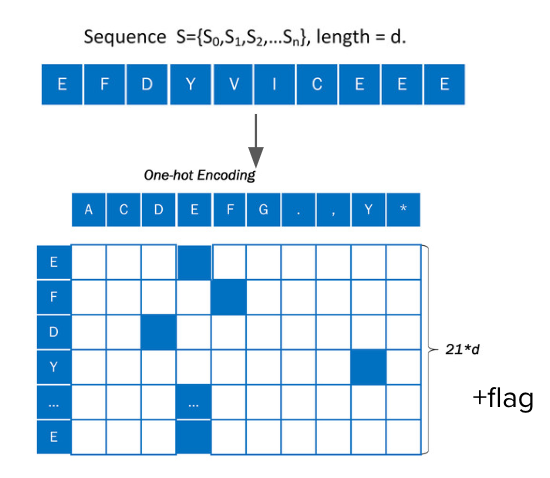

Creating array of aminoacids.

In [ ]:
aminoacids = np.array([
    ["A"], ["C"], ["D"],
    ["E"], ["F"], ["G"],
    ["H"], ["I"], ["K"],
    ["L"], ["M"], ["N"],
    ["P"], ["Q"], ["R"],
    ["S"], ["T"], ["V"],
    ["W"], ["Y"]])

Creating encoder, fitting it on the previous array of aminoacids.

In [ ]:
encoder = OneHotEncoder()
encoder = encoder.fit_transform(aminoacids).toarray()

In [ ]:
aminoacids_list = []
for i in aminoacids:
    aminoacids_list.append(i[0])

The dictionary has aminoacids as keys and encoder as values for encoding function.

In [ ]:
enc = dict(zip(aminoacids_list, encoder))

This function takes any dataset (from this notebook) as the input and encodes the aminoacids sequence.

In [ ]:
def encoding_func(dataset):
  encoded_list = []
  for i in range(len(dataset)):
    seq = dataset['junction_aa'].iloc[i]
    seq_encodded = []
    for letter in seq:
      seq_encodded.append(enc[letter])
    seq_encodded = np.array(seq_encodded)
    encoded_list.append(seq_encodded)
  encoded_list = np.array(encoded_list)
  return encoded_list

#RF models

Here we want to compare different Random Forest models. Four models are going to be trained and tested on separated data, the structure of each one presented below.

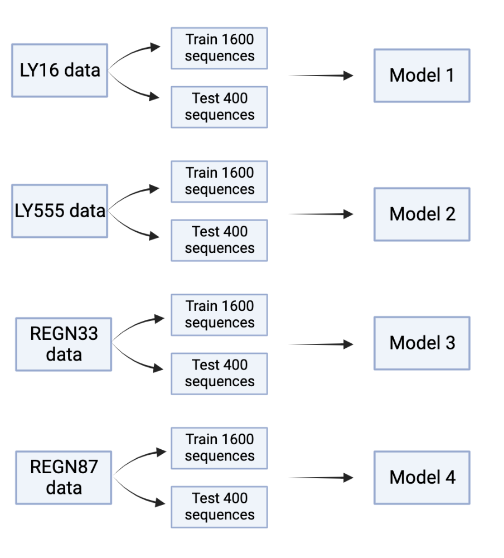

## Preprocessing data

Firstly, we need to preprocess the data: encode and add the flag for each antibody. What is the flag? It appears as the additional zero-array with the number one at zero position for LY16, first position for LY555, second position for REGN33, third position for REGN87.

The function concatenating two arrays was created for convenience

In [ ]:
def adding_enc_ab(A, B):
    C = np.concatenate((A, np.broadcast_to(np.array(B)[None, None, :], A.shape[:1] + (1,) + A.shape[2:])), axis = 1)
    return C

This function takes dataset and zero-array as the input, returns train and test datasets ready for RF models.

In [ ]:
def preprocessing_data(df, arr):
    sample = df.sample(n=2000)
    train, test = sample[0:1600], sample[1600:]
    train_enc = encoding_func(train)
    test_enc = encoding_func(test)
    train_enc = adding_enc_ab(train_enc, arr)
    test_enc = adding_enc_ab(test_enc, arr)
    train_X = train_enc.reshape(train_enc.shape[0], (train_enc.shape[1]*train_enc.shape[2]))
    test_X = test_enc.reshape(test_enc.shape[0], (test_enc.shape[1]*test_enc.shape[2]))
    train_y = train['Label']
    test_y = test['Label']
    return train_X, test_X, train_y, test_y

### LY16

For LY16 the number one is placed at the fzero position.

In [ ]:
arr = np.zeros(20)
arr[0] = 1

In [ ]:
LY16_train_X, LY16_test_X, LY16_train_y, LY16_test_y = preprocessing_data(LY16, arr)

### LY555

For LY555 the number one is placed at the first position.

In [ ]:
arr = np.zeros(20)
arr[1] = 1

In [ ]:
LY555_train_X, LY555_test_X, LY555_train_y, LY555_test_y = preprocessing_data(LY555, arr)

### REGN33

For REGN33 the number one is placed at the second position.

In [ ]:
arr = np.zeros(20)
arr[2] = 1

In [ ]:
REGN33_train_X, REGN33_test_X, REGN33_train_y, REGN33_test_y = preprocessing_data(REGN33, arr)

### REGN87

For REGN87 the number one is placed at the third position.

In [ ]:
arr = np.zeros(20)
arr[3] = 1

In [ ]:
REGN87_train_X, REGN87_test_X, REGN87_train_y, REGN87_test_y = preprocessing_data(REGN87, arr)

## RF


This function takes RF classifier, train and test datasets, prints the metrics of our interest: accuracy score,precision score, recall score, f1 score, roc-auc score.

In [ ]:
def rf(clfRF, train_X, train_y, test_X, test_y):
    clfRF.fit(train_X, train_y)
    y_predicted = clfRF.predict(test_X)
    acc = accuracy_score(test_y, y_predicted)
    pre = precision_score(test_y, y_predicted)
    rec = recall_score(test_y, y_predicted)
    f1 = f1_score(test_y, y_predicted)
    roc_auc = roc_auc_score(test_y, y_predicted)
    print('accuracy_score', acc)
    print('precision_score', pre)
    print('recall_score', rec)
    print('f1_score', f1)
    print('roc_auc_score', roc_auc)

Further four sections present results for first four models

### Model 1

In [ ]:
clfRF = RandomForestClassifier(n_estimators=500, max_depth=150, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')

In [ ]:
rf(clfRF, LY16_train_X, LY16_train_y, LY16_test_X, LY16_test_y)

accuracy_score 0.87
precision_score 0.8446601941747572
recall_score 0.8969072164948454
f1_score 0.87
roc_auc_score 0.8707837053348014


### Model 2


In [ ]:
clfRF = RandomForestClassifier(n_estimators=500, max_depth=150, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')

In [ ]:
rf(clfRF, LY555_train_X, LY555_train_y, LY555_test_X, LY555_test_y)

accuracy_score 0.8675
precision_score 0.8762886597938144
recall_score 0.8542713567839196
f1_score 0.8651399491094148
roc_auc_score 0.8674341858546463


### Model 3


In [ ]:
clfRF = RandomForestClassifier(n_estimators=500, max_depth=150, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')

In [ ]:
rf(clfRF, REGN33_train_X, REGN33_train_y, REGN33_test_X, REGN33_test_y)

accuracy_score 0.86
precision_score 0.8585365853658536
recall_score 0.8669950738916257
f1_score 0.8627450980392156
roc_auc_score 0.8598934760321072


### Model 4



In [ ]:
clfRF = RandomForestClassifier(n_estimators=500, max_depth=150, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')

In [ ]:
rf(clfRF, REGN87_train_X, REGN87_train_y, REGN87_test_X, REGN87_test_y)

accuracy_score 0.9275
precision_score 0.9523809523809523
recall_score 0.9
f1_score 0.9254498714652956
roc_auc_score 0.9274999999999999


Then we decided to explore how additional information (in our case another antibodies data) depends on the quality of RF precision. Thus, we created RF model with the structure presented below.

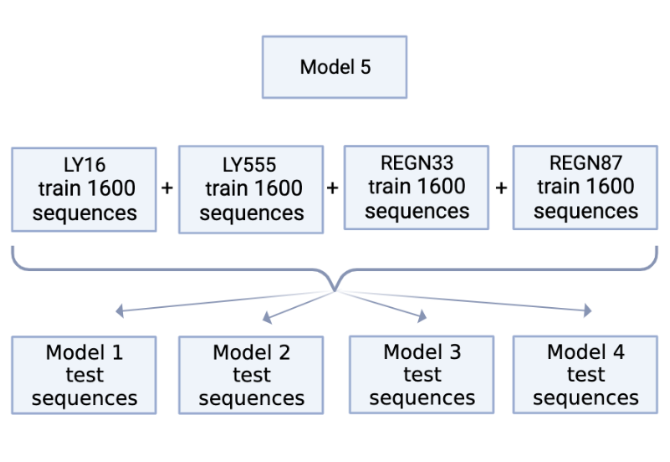

### Model 5


First of all, combine all train datasets for this task.

In [ ]:
train_X = np.concatenate((LY16_train_X, LY555_train_X, REGN33_train_X, REGN87_train_X), axis=0)
train_y = np.concatenate((LY16_train_y, LY555_train_y, REGN33_train_y, REGN87_train_y), axis=0)

#### test 1

In [ ]:
clfRF = RandomForestClassifier(n_estimators=500, max_depth=150, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')

Here and further we use combined train data and separated test data.

In [ ]:
rf(clfRF, train_X, train_y, LY16_test_X, LY16_test_y)

accuracy_score 0.8025
precision_score 0.7725118483412322
recall_score 0.8402061855670103
f1_score 0.8049382716049382
roc_auc_score 0.8035982384145732


#### test 2

In [ ]:
clfRF = RandomForestClassifier(n_estimators=500, max_depth=150, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')

In [ ]:
rf(clfRF, train_X, train_y, LY555_test_X, LY555_test_y)

accuracy_score 0.8025
precision_score 0.7631578947368421
recall_score 0.8743718592964824
f1_score 0.8149882903981266
roc_auc_score 0.802857571439286


#### test 3

In [ ]:
clfRF = RandomForestClassifier(n_estimators=500, max_depth=150, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')

In [ ]:
rf(clfRF, train_X, train_y, REGN33_test_X, REGN33_test_y)

accuracy_score 0.8
precision_score 0.8
recall_score 0.8078817733990148
f1_score 0.803921568627451
roc_auc_score 0.7998799729939235


#### test 4

In [ ]:
clfRF = RandomForestClassifier(n_estimators=500, max_depth=150, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')

In [ ]:
rf(clfRF, train_X, train_y, REGN87_test_X, REGN87_test_y)

accuracy_score 0.94
precision_score 0.9489795918367347
recall_score 0.93
f1_score 0.9393939393939393
roc_auc_score 0.9400000000000001


The statistics and visualization of obtained results were made using Prism 8